___

# KNN
___


___
## Imports section

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

import seaborn as sns

from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report

from matplotlib.colors import ListedColormap

___
## Data Exploring

### Read dataset and show head

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Info

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


### Data Describe

In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Histogram on Y axis

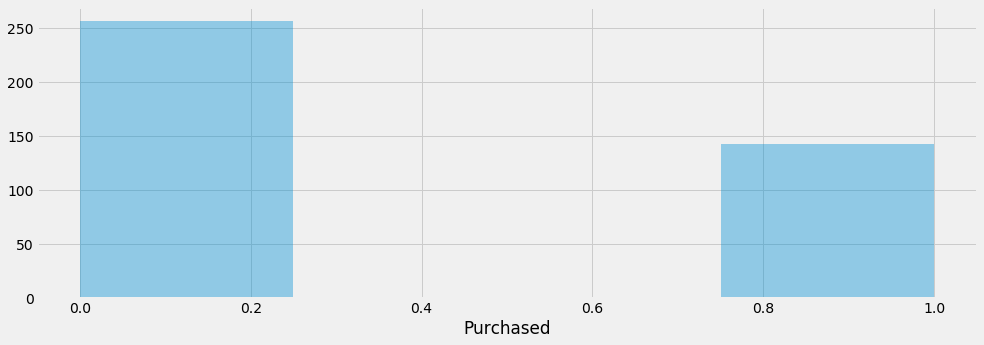

In [6]:
sns.distplot(dataset['Purchased'],kde=False)

### Correlation

In [7]:
corr = dataset.corr()
corr

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


### Heatmap

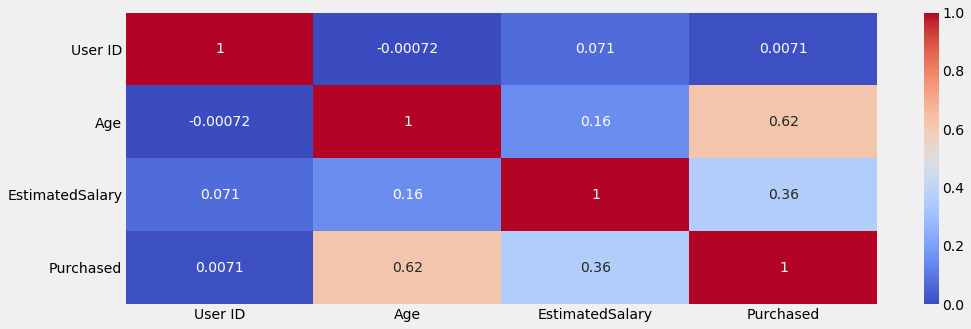

In [8]:
sns.heatmap(data=corr,cmap="coolwarm",annot=True)

___
## Data Processing

### Separation: X (features) from Y (predict variable)

In [9]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Spliting the Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

### Feature Scaling

In [12]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


___
## Model Desing

### Creating and training models

In [15]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predictions

In [16]:
predictions = classifier.predict(X_test)

### Model Performace Analysis

In [17]:
cm = confusion_matrix(y_true=y_test, y_pred= predictions)
df_cm =pd.DataFrame(data=cm,index=['Real False', 'Real True'], columns=['Pred False', 'Pred True'])
df_cm

,Pred False,Pred True
Real False,64,4
Real True,3,29


### Evaluating Model

In [18]:
def plot_classifier(X_set, y_set, title, xlabel, ylabel, classifier):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.55, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

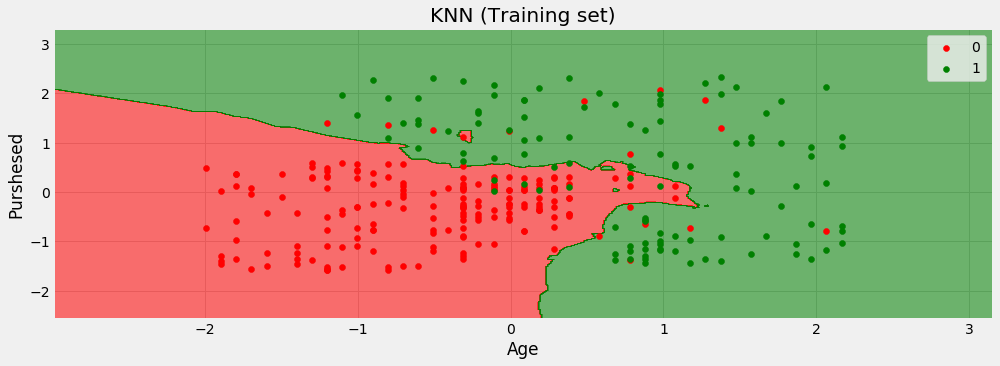

In [19]:
title = 'KNN (Training set)'
xlabel = 'Age'
ylabel = 'Purshesed'
plot_classifier(X_train, y_train, title, xlabel, ylabel, classifier)

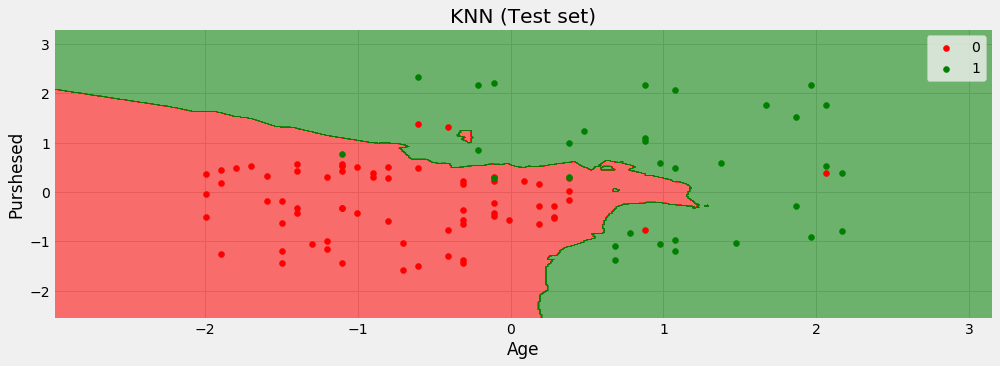

In [20]:
title = 'KNN (Test set)'
xlabel = 'Age'
ylabel = 'Purshesed'
plot_classifier(X_test, y_test, title, xlabel, ylabel, classifier)